## Three Stock Monte

This exercise tests your ability to retrieve stock price data using the Alpaca API and simulate multiple portfolio compositions using Monte Carlo Simulation.

### Import Dependencies

In [12]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [13]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 5 Year's Worth of Stock Price Data via Alpaca API Call

In [15]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2015-08-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["T","NKE","XOM"]

# 5 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

NKE                                       T  \
                             open    high     low   close   volume   open   
2015-08-03 00:00:00-04:00  57.755  58.000  56.795  57.410  3878026  34.95   
2015-08-04 00:00:00-04:00  57.375  57.965  57.165  57.885  4297146  34.70   
2015-08-05 00:00:00-04:00  58.305  58.860  29.180  58.390  5899176  34.79   
2015-08-06 00:00:00-04:00  58.500  58.750  57.185  57.565  4991234  34.55   
2015-08-07 00:00:00-04:00  57.360  57.480  56.550  57.270  4880548  34.11   

                                                            XOM         \
                            high    low  close    volume   open   high   
2015-08-03 00:00:00-04:00  35.02  34.50  34.64  27092543  78.70  78.93   
2015-08-04 00:00:00-04:00  34.80  34.50  34.56  22147458  77.88  78.61   
2015-08-05 00:00:00-04:00  34.83  34.51  34.57  20269496  77.87  78.23   
2015-08-06 00:00:00-04:00  34.59  33.95  34.24  28073607  76.94  78.26   
2015-08-07 00:00:00-04:00  34.26  34.04  34.22  23470697  77.55  77.97   

                                                     
                               low  close    volume  
2015-08-03 00:00:00-04:00  77.6300  78.07  13624294  
2015-08-04 00:00:00-04:00  76.9300  77.15  16301910  
2015-08-05 00:00:00-04:00  76.9000  77.12  13768947  
2015-08-06 00:00:00-04:00  76.9100  78.10  10934169  
2015-08-07 00:00:00-04:00  76.6178  76.84  10214432

### Simulate five year portfolio growth with evenly-distributed stock investments

In [16]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns, 1000 simulations, investing evenly across all stocks
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

NKE                                   \
                             open    high     low   close   volume   
2015-08-03 00:00:00-04:00  57.755  58.000  56.795  57.410  3878026   
2015-08-04 00:00:00-04:00  57.375  57.965  57.165  57.885  4297146   
2015-08-05 00:00:00-04:00  58.305  58.860  29.180  58.390  5899176   
2015-08-06 00:00:00-04:00  58.500  58.750  57.185  57.565  4991234   
2015-08-07 00:00:00-04:00  57.360  57.480  56.550  57.270  4880548   

                                            T                                 \
                          daily_return   open   high    low  close    volume   
2015-08-03 00:00:00-04:00          NaN  34.95  35.02  34.50  34.64  27092543   
2015-08-04 00:00:00-04:00     0.008274  34.70  34.80  34.50  34.56  22147458   
2015-08-05 00:00:00-04:00     0.008724  34.79  34.83  34.51  34.57  20269496   
2015-08-06 00:00:00-04:00    -0.014129  34.55  34.59  33.95  34.24  28073607   
2015-08-07 00:00:00-04:00    -0.005125  34.11  34.26  34.04  34.22  23470697   

                                          XOM                         \
                          daily_return   open   high      low  close   
2015-08-03 00:00:00-04:00          NaN  78.70  78.93  77.6300  78.07   
2015-08-04 00:00:00-04:00    -0.002309  77.88  78.61  76.9300  77.15   
2015-08-05 00:00:00-04:00     0.000289  77.87  78.23  76.9000  77.12   
2015-08-06 00:00:00-04:00    -0.009546  76.94  78.26  76.9100  78.10   
2015-08-07 00:00:00-04:00    -0.000584  77.55  77.97  76.6178  76.84   

                                                  
                             volume daily_return  
2015-08-03 00:00:00-04:00  13624294          NaN  
2015-08-04 00:00:00-04:00  16301910    -0.011784  
2015-08-05 00:00:00-04:00  13768947    -0.000389  
2015-08-06 00:00:00-04:00  10934169     0.012707  
2015-08-07 00:00:00-04:00  10214432    -0.016133

In [17]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010969,0.974444,1.015721,1.010374,1.012103,1.006418,0.986388,1.002446,1.010268,1.028800,...,0.971265,0.995226,1.003180,1.004144,0.995667,1.014241,1.019136,0.997570,0.997460,0.982655
2,1.008277,0.959998,1.031601,1.022057,0.999066,1.011739,1.000592,0.998398,1.015879,1.055719,...,0.946813,1.006989,1.004312,1.001333,0.988905,1.019538,1.007205,0.988931,1.017310,0.985920
3,1.004034,0.952099,1.038865,1.051186,1.025645,1.039509,0.979398,0.963665,1.036680,1.041286,...,0.969868,1.015908,0.989136,1.009007,0.984298,1.025985,1.016772,1.013567,1.020845,0.991002
4,0.982384,0.954791,1.044589,1.026077,1.034491,1.040807,0.988114,0.954503,1.027911,1.031277,...,0.964735,0.993392,0.990437,1.011103,0.950149,0.998596,1.032082,1.011340,1.035268,1.003185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.894931,0.971803,0.771495,3.151032,2.235491,3.564690,0.694314,2.065233,0.862809,2.819094,...,0.709157,0.844306,1.861155,1.825950,0.962924,1.262395,2.173305,1.143766,1.188862,0.857136
1257,1.871121,0.966528,0.766036,3.167919,2.227507,3.548946,0.683272,2.057855,0.870076,2.811996,...,0.701790,0.857782,1.874635,1.805965,0.960650,1.245611,2.156980,1.142371,1.181193,0.858623
1258,1.875986,0.942091,0.791009,3.142015,2.247532,3.540520,0.680402,2.121736,0.877336,2.849889,...,0.720306,0.853426,1.890626,1.809348,0.947776,1.257995,2.164786,1.162600,1.195834,0.875148
1259,1.827050,0.946271,0.808748,3.192033,2.226066,3.500790,0.689341,2.196531,0.877264,2.896638,...,0.717688,0.851413,1.874226,1.795459,0.944284,1.247264,2.094755,1.129352,1.189845,0.873867


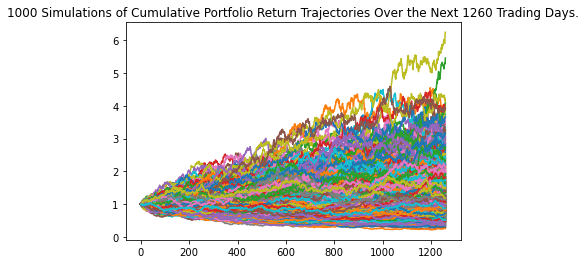

In [18]:
# Plot simulation outcomes and saving figure
line_plot = MC_even_dist.plot_simulation()

line_plot.get_figure().savefig("../Images/MC_fiveyear_sim_plot.png", bbox_inches='tight')

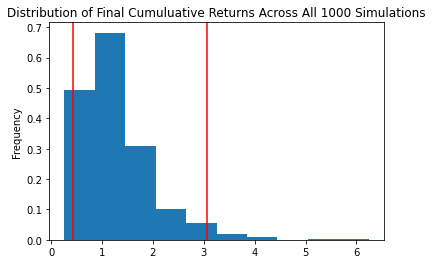

In [19]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('../Images/MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.264910
std                0.688393
min                0.260020
25%                0.804933
50%                1.107039
75%                1.545844
max                6.241232
95% CI Lower       0.427639
95% CI Upper       3.058657
Name: 1260, dtype: float64


In [21]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of my $15,000 investments stocks
ci_lower = round(even_tbl[8]*15000,2)
ci_upper = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio\n"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio
 over the next 5 years will end within in the range of $6414.58 and $45879.86


### Simulate five year portfolio growth with 60% AT&T stock

In [22]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
MC_att = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.60,.20],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_att.portfolio_data.head()

NKE                                   \
                             open    high     low   close   volume   
2015-08-03 00:00:00-04:00  57.755  58.000  56.795  57.410  3878026   
2015-08-04 00:00:00-04:00  57.375  57.965  57.165  57.885  4297146   
2015-08-05 00:00:00-04:00  58.305  58.860  29.180  58.390  5899176   
2015-08-06 00:00:00-04:00  58.500  58.750  57.185  57.565  4991234   
2015-08-07 00:00:00-04:00  57.360  57.480  56.550  57.270  4880548   

                                            T                                 \
                          daily_return   open   high    low  close    volume   
2015-08-03 00:00:00-04:00          NaN  34.95  35.02  34.50  34.64  27092543   
2015-08-04 00:00:00-04:00     0.008274  34.70  34.80  34.50  34.56  22147458   
2015-08-05 00:00:00-04:00     0.008724  34.79  34.83  34.51  34.57  20269496   
2015-08-06 00:00:00-04:00    -0.014129  34.55  34.59  33.95  34.24  28073607   
2015-08-07 00:00:00-04:00    -0.005125  34.11  34.26  34.04  34.22  23470697   

                                          XOM                         \
                          daily_return   open   high      low  close   
2015-08-03 00:00:00-04:00          NaN  78.70  78.93  77.6300  78.07   
2015-08-04 00:00:00-04:00    -0.002309  77.88  78.61  76.9300  77.15   
2015-08-05 00:00:00-04:00     0.000289  77.87  78.23  76.9000  77.12   
2015-08-06 00:00:00-04:00    -0.009546  76.94  78.26  76.9100  78.10   
2015-08-07 00:00:00-04:00    -0.000584  77.55  77.97  76.6178  76.84   

                                                  
                             volume daily_return  
2015-08-03 00:00:00-04:00  13624294          NaN  
2015-08-04 00:00:00-04:00  16301910    -0.011784  
2015-08-05 00:00:00-04:00  13768947    -0.000389  
2015-08-06 00:00:00-04:00  10934169     0.012707  
2015-08-07 00:00:00-04:00  10214432    -0.016133

In [23]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
MC_att.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000995,1.000743,0.992739,1.003476,1.008368,1.007485,1.011219,0.980369,1.002666,0.993043,...,1.015889,0.990270,0.978624,1.000943,1.015958,0.995406,1.020883,0.998264,1.012132,0.994164
2,1.000289,1.015579,0.979314,1.008810,1.004057,1.018812,1.001788,1.005487,0.994443,0.987772,...,1.021677,1.004236,0.968313,0.996116,1.029747,1.003133,1.028820,0.980841,1.003414,0.982172
3,0.988951,1.025632,0.996418,1.006036,1.014414,1.029729,1.015932,1.032664,0.999089,0.977683,...,1.034575,1.010264,0.965501,0.996207,1.031221,0.986672,1.032244,1.001536,1.001234,0.980523
4,0.986272,1.027868,0.990038,1.015899,0.997759,1.042435,0.994489,1.043600,0.991761,0.980890,...,1.029345,0.997830,0.981150,0.987964,1.027631,0.987568,1.054369,0.999468,1.000732,0.979448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.370026,0.697705,1.260797,0.833040,1.307874,1.041931,0.563674,0.506909,1.301109,0.809750,...,0.706876,1.216807,3.189783,1.196887,1.218094,0.574066,2.771101,1.088228,1.682163,1.059180
1257,1.373000,0.697728,1.243095,0.824090,1.336793,1.063096,0.558745,0.506351,1.286580,0.811360,...,0.701716,1.217880,3.179631,1.171288,1.204508,0.571948,2.776635,1.081245,1.655682,1.037508
1258,1.389023,0.693105,1.249623,0.835885,1.355677,1.063185,0.566393,0.499682,1.303894,0.817911,...,0.691156,1.227165,3.181235,1.182978,1.240465,0.569890,2.751749,1.084697,1.655878,1.033660
1259,1.375852,0.696267,1.235224,0.837561,1.319716,1.062059,0.565491,0.508327,1.308922,0.830000,...,0.691581,1.229348,3.180974,1.191978,1.247625,0.564794,2.767185,1.079646,1.667152,1.044038


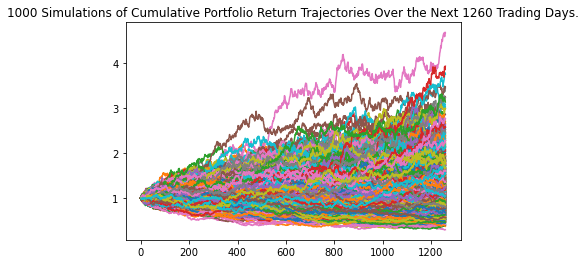

In [24]:
# Plot simulation outcomes
line_plot = MC_att.plot_simulation()

line_plot.get_figure().savefig("../Images/MC_att_fiveyear_sim_plot.png", bbox_inches='tight')

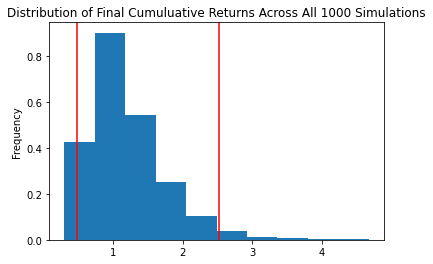

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = MC_att.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('../Images/MC_att_fiveyear_dist_plot.png',bbox_inches='tight')

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_att.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1000.000000
mean               1.189854
std                0.537050
min                0.301599
25%                0.809044
50%                1.080405
75%                1.438756
max                4.670040
95% CI Lower       0.484625
95% CI Upper       2.516211
Name: 1260, dtype: float64


In [27]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of my $15,000 investments stocks overweight att
ci_lower = round(att_tbl[8]*15000,2)
ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio an overweight of AT&T of 60%\n"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $15,000 in the portfolio an overweight of AT&T of 60%
 over the next 5 years will end within in the range of $7269.38 and $37743.16


### Simulate five year portfolio growth with 60% Nike stock

In [28]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_nike = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.20,.20],
    num_simulation = 1000,
    num_trading_days = 252*5
)


# Printing the simulation input data
MC_nike.portfolio_data.head()

NKE                                   \
                             open    high     low   close   volume   
2015-08-03 00:00:00-04:00  57.755  58.000  56.795  57.410  3878026   
2015-08-04 00:00:00-04:00  57.375  57.965  57.165  57.885  4297146   
2015-08-05 00:00:00-04:00  58.305  58.860  29.180  58.390  5899176   
2015-08-06 00:00:00-04:00  58.500  58.750  57.185  57.565  4991234   
2015-08-07 00:00:00-04:00  57.360  57.480  56.550  57.270  4880548   

                                            T                                 \
                          daily_return   open   high    low  close    volume   
2015-08-03 00:00:00-04:00          NaN  34.95  35.02  34.50  34.64  27092543   
2015-08-04 00:00:00-04:00     0.008274  34.70  34.80  34.50  34.56  22147458   
2015-08-05 00:00:00-04:00     0.008724  34.79  34.83  34.51  34.57  20269496   
2015-08-06 00:00:00-04:00    -0.014129  34.55  34.59  33.95  34.24  28073607   
2015-08-07 00:00:00-04:00    -0.005125  34.11  34.26  34.04  34.22  23470697   

                                          XOM                         \
                          daily_return   open   high      low  close   
2015-08-03 00:00:00-04:00          NaN  78.70  78.93  77.6300  78.07   
2015-08-04 00:00:00-04:00    -0.002309  77.88  78.61  76.9300  77.15   
2015-08-05 00:00:00-04:00     0.000289  77.87  78.23  76.9000  77.12   
2015-08-06 00:00:00-04:00    -0.009546  76.94  78.26  76.9100  78.10   
2015-08-07 00:00:00-04:00    -0.000584  77.55  77.97  76.6178  76.84   

                                                  
                             volume daily_return  
2015-08-03 00:00:00-04:00  13624294          NaN  
2015-08-04 00:00:00-04:00  16301910    -0.011784  
2015-08-05 00:00:00-04:00  13768947    -0.000389  
2015-08-06 00:00:00-04:00  10934169     0.012707  
2015-08-07 00:00:00-04:00  10214432    -0.016133

In [29]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_nike.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983466,0.958323,0.976602,0.981861,1.001911,1.027522,0.998195,1.029060,1.030725,1.002169,...,1.014968,1.014572,0.990016,1.002928,1.006922,1.000641,0.985257,0.999366,0.983976,0.962825
2,0.991311,0.917037,1.034361,0.977549,0.983650,0.981017,0.996637,1.064822,1.038285,0.930036,...,1.008588,1.014720,1.032665,1.049045,1.000143,1.006400,1.021163,0.997566,1.027495,0.964924
3,0.986549,0.870430,1.039391,0.996034,1.026170,0.978702,1.006138,1.105770,1.046293,0.968496,...,1.012263,0.993899,1.065774,1.053826,0.997911,0.978972,1.027405,1.029293,1.021975,0.957512
4,0.965547,0.884085,1.111299,0.974976,1.033580,0.959774,0.970404,1.068735,1.046937,0.971801,...,1.018951,0.983860,1.107857,1.048041,0.978895,0.998563,1.043656,1.055957,1.004809,0.992282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,6.392227,0.863019,0.672688,0.811400,2.329729,3.672962,2.227272,1.365825,1.819693,2.964374,...,1.832006,0.562922,1.415045,0.433052,1.821312,0.565191,1.722052,1.075365,1.470159,3.840365
1257,6.668722,0.848146,0.669093,0.826348,2.258437,3.591152,2.155053,1.334964,1.781856,2.923959,...,1.819656,0.570516,1.446077,0.432749,1.800183,0.572744,1.654321,1.090386,1.461871,3.940401
1258,6.574538,0.867962,0.682189,0.855018,2.267658,3.637952,2.107623,1.327357,1.768977,2.908802,...,1.840933,0.551911,1.450625,0.450938,1.734175,0.571734,1.664265,1.074124,1.438233,3.964403
1259,6.588681,0.864615,0.658223,0.861100,2.243445,3.576890,2.100125,1.336950,1.769561,2.935307,...,1.850780,0.568214,1.451351,0.444946,1.666031,0.581475,1.716752,1.070809,1.411229,3.938648


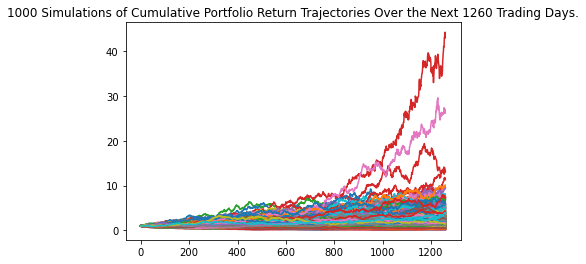

In [30]:
# Plot simulation outcomes
line_plot = MC_nike.plot_simulation()

line_plot.get_figure().savefig("../Images/MC_nike_fiveyear_sim_plot.png", bbox_inches='tight')

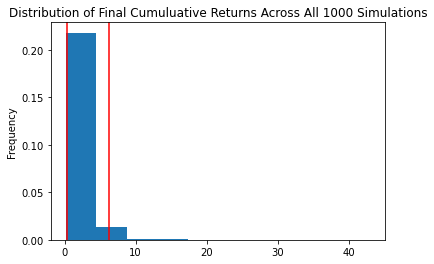

In [31]:
# Plot probability distribution and confidence intervals
dist_plot = MC_nike.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('../Images/MC_nike_fiveyear_dist_plot.png',bbox_inches='tight')

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
nike_tbl = MC_nike.summarize_cumulative_return()

# Print summary statistics
print(nike_tbl)

count           1000.000000
mean               1.910740
std                2.170836
min                0.155653
25%                0.821802
50%                1.430161
75%                2.325953
max               42.992908
95% CI Lower       0.310085
95% CI Upper       6.197487
Name: 1260, dtype: float64


In [33]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of my $15,000 investments stocks overweight Nike
ci_lower = round(nike_tbl[8]*15000,2)
ci_upper = round(nike_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio an overweight of Nike of 60%\n"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $15,000 in the portfolio an overweight of Nike of 60%
 over the next 5 years will end within in the range of $4651.28 and $92962.31


### Simulate five year portfolio growth with 60% Exxon stock

In [34]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_exxon = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.20,.60],
    num_simulation = 1000,
    num_trading_days = 252*5
)


# Printing the simulation input data
MC_exxon.portfolio_data

NKE                                    \
                             open    high      low   close   volume   
2015-08-03 00:00:00-04:00  57.755  58.000  56.7950  57.410  3878026   
2015-08-04 00:00:00-04:00  57.375  57.965  57.1650  57.885  4297146   
2015-08-05 00:00:00-04:00  58.305  58.860  29.1800  58.390  5899176   
2015-08-06 00:00:00-04:00  58.500  58.750  57.1850  57.565  4991234   
2015-08-07 00:00:00-04:00  57.360  57.480  56.5500  57.270  4880548   
...                           ...     ...      ...     ...      ...   
2020-07-27 00:00:00-04:00  96.960  98.400  96.8900  97.220  3649370   
2020-07-28 00:00:00-04:00  96.950  97.470  96.1600  96.280  5543867   
2020-07-29 00:00:00-04:00  96.430  97.550  96.2950  96.970  8432892   
2020-07-30 00:00:00-04:00  96.470  97.230  95.7965  96.830  7168814   
2020-07-31 00:00:00-04:00  96.890  97.650  96.3000  97.630  8596709   

                                            T                                 \
                          daily_return   open   high    low  close    volume   
2015-08-03 00:00:00-04:00          NaN  34.95  35.02  34.50  34.64  27092543   
2015-08-04 00:00:00-04:00     0.008274  34.70  34.80  34.50  34.56  22147458   
2015-08-05 00:00:00-04:00     0.008724  34.79  34.83  34.51  34.57  20269496   
2015-08-06 00:00:00-04:00    -0.014129  34.55  34.59  33.95  34.24  28073607   
2015-08-07 00:00:00-04:00    -0.005125  34.11  34.26  34.04  34.22  23470697   
...                                ...    ...    ...    ...    ...       ...   
2020-07-27 00:00:00-04:00    -0.012293  29.50  29.51  29.21  29.28  30880787   
2020-07-28 00:00:00-04:00    -0.009669  29.26  29.89  29.20  29.69  56999588   
2020-07-29 00:00:00-04:00     0.007167  29.67  29.67  29.31  29.58  55230910   
2020-07-30 00:00:00-04:00    -0.001444  29.47  29.73  29.36  29.58  49603467   
2020-07-31 00:00:00-04:00     0.008262  29.51  29.62  29.27  29.59  58572947   

                                          XOM                         \
                          daily_return   open   high      low  close   
2015-08-03 00:00:00-04:00          NaN  78.70  78.93  77.6300  78.07   
2015-08-04 00:00:00-04:00    -0.002309  77.88  78.61  76.9300  77.15   
2015-08-05 00:00:00-04:00     0.000289  77.87  78.23  76.9000  77.12   
2015-08-06 00:00:00-04:00    -0.009546  76.94  78.26  76.9100  78.10   
2015-08-07 00:00:00-04:00    -0.000584  77.55  77.97  76.6178  76.84   
...                                ...    ...    ...      ...    ...   
2020-07-27 00:00:00-04:00    -0.009807  43.23  44.09  42.9715  44.07   
2020-07-28 00:00:00-04:00     0.014003  43.91  44.25  43.4600  43.55   
2020-07-29 00:00:00-04:00    -0.003705  43.71  44.09  43.3400  44.04   
2020-07-30 00:00:00-04:00     0.000000  43.13  43.18  41.8250  41.90   
2020-07-31 00:00:00-04:00     0.000338  41.16  42.17  40.9100  42.08   

                                                  
                             volume daily_return  
2015-08-03 00:00:00-04:00  13624294          NaN  
2015-08-04 00:00:00-04:00  16301910    -0.011784  
2015-08-05 00:00:00-04:00  13768947    -0.000389  
2015-08-06 00:00:00-04:00  10934169     0.012707  
2015-08-07 00:00:00-04:00  10214432    -0.016133  
...                             ...          ...  
2020-07-27 00:00:00-04:00  14396499     0.014970  
2020-07-28 00:00:00-04:00  27638620    -0.011799  
2020-07-29 00:00:00-04:00  24161118     0.011251  
2020-07-30 00:00:00-04:00  54125525    -0.048592  
2020-07-31 00:00:00-04:00  53243186     0.004296  

[1259 rows x 18 columns]

In [35]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Exxon stock
MC_exxon.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993726,0.977016,0.978078,0.996239,1.002476,1.000056,0.980619,0.983660,0.998076,1.015571,...,0.994952,1.008950,0.983875,1.008869,1.002597,0.980224,0.999974,0.972728,1.017330,1.024317
2,0.983888,0.977000,0.981321,0.985399,1.007776,1.001924,0.987045,0.990336,0.992109,1.021918,...,0.988925,1.008742,0.991574,0.996152,1.000436,0.975903,0.990374,0.973993,1.002888,1.014472
3,1.000480,0.997529,0.971936,0.994677,1.015050,0.999221,0.977161,0.974859,0.991443,1.009740,...,0.984411,0.981893,0.989313,1.003193,0.998070,0.980354,0.992793,0.970635,0.987771,0.999636
4,1.000493,0.990047,0.967918,0.996300,1.017108,1.013897,0.972026,0.972816,0.991559,0.997265,...,1.008023,0.978001,0.989553,1.001260,1.000374,0.985583,1.018268,0.976644,0.986128,1.018732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.324312,0.776668,0.799449,1.012915,0.519051,1.036332,3.661233,1.252928,0.936730,1.023577,...,0.949717,0.604388,0.707516,0.526038,0.852320,1.474898,0.678860,1.165684,0.926769,0.446391
1257,2.334658,0.772781,0.788807,1.003894,0.526042,1.038828,3.726157,1.229769,0.922633,1.038072,...,0.954297,0.602728,0.707965,0.516155,0.858992,1.492475,0.668925,1.195226,0.930872,0.447450
1258,2.362443,0.774434,0.774595,1.009443,0.535136,1.066176,3.733438,1.242698,0.928878,1.038322,...,0.956647,0.603041,0.715722,0.523516,0.864891,1.507470,0.658467,1.192145,0.922863,0.451375
1259,2.378713,0.772405,0.777929,1.003096,0.532654,1.057206,3.785887,1.224041,0.914404,1.038926,...,0.964483,0.592877,0.711623,0.531441,0.868495,1.485665,0.650948,1.194874,0.933846,0.442768


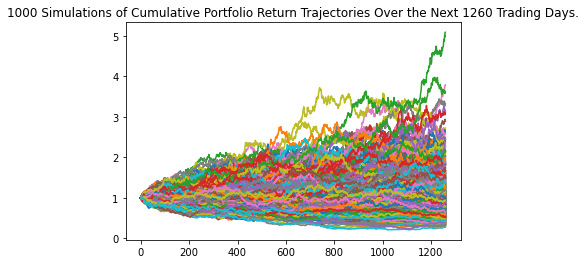

In [36]:
# Plot simulation outcomes
line_plot = MC_exxon.plot_simulation()

line_plot.get_figure().savefig("../Images/MC_exxon_fiveyear_sim_plot.png", bbox_inches='tight')

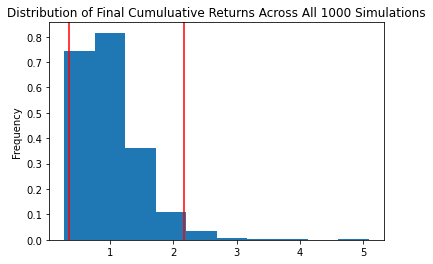

In [37]:
# Plot probability distribution and conMC_exxonce intervals
dist_plot = MC_exxon.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('../Images/MC_exxon_fiveyear_dist_plot.png',bbox_inches='tight')

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
exxon_tbl = MC_exxon.summarize_cumulative_return()

# Print summary statistics
print(exxon_tbl)

count           1000.000000
mean               0.999326
std                0.498205
min                0.280132
25%                0.648396
50%                0.911303
75%                1.241037
max                5.085838
95% CI Lower       0.355052
95% CI Upper       2.168406
Name: 1260, dtype: float64


In [39]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of my $15,000 investments stocks overweight Nike
ci_lower = round(exxon_tbl[8]*15000,2)
ci_upper = round(exxon_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio an overweight of Exxon of 60%\n"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $15,000 in the portfolio an overweight of Exxon of 60%
 over the next 5 years will end within in the range of $5325.78 and $32526.09


### Summarize findings across all 4 simulations

##### After running 1,000 simluations on 4 different scenarios I can conclude that the porfolio overweighted with AT&T is the riskiest with a Standard Deviation of 1.69, but has the most return on average with a mean of 1.87. The least risky is the porfolio overweighted with Exxon and a Standard Deviation of 0.48 but a return of only 0.98 on average. For my portfolio I would choose the Nike overweighted portfolio. It has roughly the same level of risk with more upside.